In [4]:
import pandas as pd
import numpy as np
import collections

In [6]:
pd.read_excel('i_p_Australia.xls', header=None)

,0,1,2
0,Minecraft,Mojang,Games
1,WikiCamps Australia,Angry Robot,Travel (Applications)
2,Bloons TD 6,Ninja Kiwi,Games
3,Heads Up!,Warner Bros,Games
4,Monopoly,Marmalade,Games
...,...,...,...
95,Papa's Hot Doggeria To Go!,Flipline,Games
96,Video & TV Cast Pro for Sony,2kit Consulting,Photo and Video (Applications)
97,Chemical Maze - Shopping Companion,없음,Medical (Applications)
98,Notability,GingerLabs,Productivity (Applications)


In [8]:
df = pd.read_excel('i_p_Australia.xls', header=None)

In [9]:
df[2]

0                              Games
1              Travel (Applications)
2                              Games
3                              Games
4                              Games
                   ...              
95                             Games
96    Photo and Video (Applications)
97            Medical (Applications)
98       Productivity (Applications)
99                             Games
Name: 2, Length: 100, dtype: object

In [10]:
counts = collections.Counter(df[2])

In [11]:
print(counts)

Counter({'Games': 57, 'Health and Fitness (Applications)': 10, 'Photo and Video (Applications)': 7, 'Productivity (Applications)': 6, 'Education (Applications)': 4, 'Travel (Applications)': 2, 'Medical (Applications)': 2, 'Utilities (Applications)': 2, 'Lifestyle (Applications)': 2, 'Graphics & Design (Applications)': 1, 'Weather (Applications)': 1, 'Social Networking (Applications)': 1, 'Navigation (Applications)': 1, 'Entertainment (Applications)': 1, 'Food and Drink (Applications)': 1, 'Music (Applications)': 1, 'Business (Applications)': 1})


In [12]:
dict = {'Life':['Food and Drink (Applications)', 'Health and Fitness (Applications)','Lifestyle (Applications)', 'Weather (Applications)', 'Medical (Applications)', 'Navigation (Applications)','Finance (Applications)'],
        'Leisure':['Entertainment (Applications)', 'Shopping (Applications)', 'Social Networking (Applications)', 'Sports (Applications)', 'Travel (Applications)', 'Music (Applications)', 'Photo and Video (Applications)'],
        'Work':['Business (Applications)', 'Developer Tools (Applications)', 'Graphics & Design (Applications)', 'Productivity (Applications)'],
        'Edu':['Books (Applications)', 'Catalogs (Applications)', 'Education (Applications)', 'Reference (Applications)',' Magazines and Newspapers (Applications)', 'News (Applications)', 'Utilities (Applications)']}

In [13]:
set_group = ['Life', 'Leisure', 'Work', 'Edu']

In [14]:
count_group = []
group = []
sum = 0
for group in set_group: # group : key = Life
    name = dict[group]
    group = dict[group] # dict['Life']
    for category in group: # Food and Drink (Applications)
        for key, value in counts.items():
            if key == category:
                sum = value + sum
    count_group.append(sum)
    print(sum)
    sum = 0

17
12
8
6


In [15]:
count_group

[17, 12, 8, 6]

In [16]:
set_group = {x:y for x,y in zip(set_group, count_group)}

In [17]:
set_group

{'Life': 17, 'Leisure': 12, 'Work': 8, 'Edu': 6}

### Donut chart with subgraphs

In [18]:
# importing library and set figure size

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

In [117]:
Application = set_group.get('Life') + set_group.get('Leisure') + set_group.get('Work') + set_group.get('Edu')
Life = set_group.get('Life')
Leisure = set_group.get('Leisure')
Work = set_group.get('Work')
Edu = set_group.get('Edu')
Games = counts.get('Games')
Kids = counts.get('Kids')
if Kids is None:
    Kids = 0

In [118]:
# info. of groups
    
group_names = ['Application', 'Games', 'Kids']
group_sizes = [Application, Games, Kids]

# info. of subgroups
subgroup_names = ['Life', 'Leisure', 'Work', 'Edu', 'Games', 'Kids']
subgroup_sizes = [Life, Leisure, Work, Edu, Games, Kids]

# colors
a, b, c = [plt.cm.Reds, plt.cm.Greens, plt.cm.Blues]

# width
width_num = 0.4

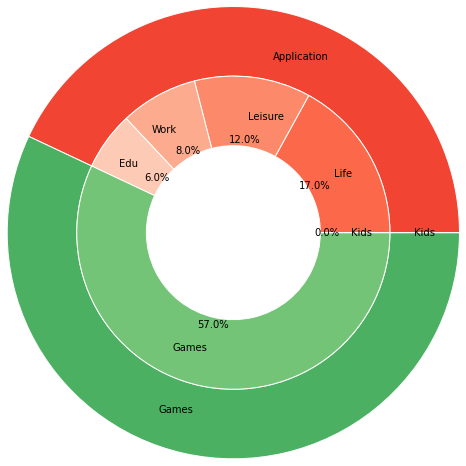

In [127]:
# Outside Ring

fig, ax = plt.subplots()
ax.axis('equal')
pie_outside, _ = ax.pie(group_sizes, 
                        radius=1.3, 
                        labels=group_names, 
                        labeldistance=0.8,
                        colors=[a(0.6), b(0.6), c(0.6)])

plt.setp(pie_outside, 
         width=width_num, 
         edgecolor='white')

# Inside Ring

pie_inside, plt_labels, junk = \
    ax.pie(subgroup_sizes, 
           radius=(1.3 - width_num), 
           labels=subgroup_names, 
           labeldistance=0.75, 
           autopct='%1.1f%%', 
           colors=[a(0.5), a(0.4), a(0.3), a(0.2), 
                   b(0.5), 
                   c(0.5)])

plt.setp(pie_inside, 
         width=width_num, 
         edgecolor='white')

fig.set_size_inches(8,8) ## 사이즈 조절
plt.show()

### Pie Chart

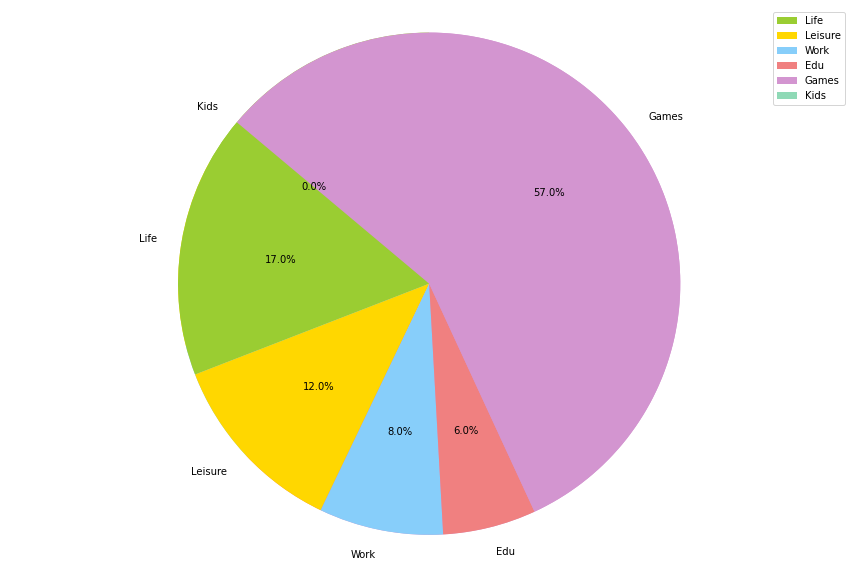

In [126]:
import matplotlib.pyplot as plt

labels = ['Life', 'Leisure', 'Work', 'Edu', 'Games', 'Kids']
sizes = [set_group.get('Life'), set_group.get('Leisure'), set_group.get('Work'), set_group.get('Edu'), Games, Kids]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', '#d395d0', '#8fd9b6']
patches, texts = plt.pie(sizes, colors=colors, startangle=90)

# Plot
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)

plt.legend(patches, labels, loc="best")
plt.axis('equal')
plt.tight_layout()
fig.set_size_inches(8,8) ## 사이즈 조절
plt.show()